In [19]:
import os 
import sys
sys.path.append("../galess")
import lens_stat as ls
import ls_utils as utils
import lens_plot
import HOD

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)
h = 0.7
___PLOT_FOR_KEYNOTE___ = 1

M_array     = np.linspace(-13 , -25 , 25)
sigma_array = np.linspace(100 , 400 , 31)
zl_array    = np.arange(0.  , 2.4 , 0.1)
zs_array    = np.arange(0.  , 5.4 , 0.2)
min_SNR     = 20
arc_mu_thr  = 3

In [52]:
zs = 3.5

M_array = np.linspace(-15 , -27 , 25)
corr = 5 * np.log10(cosmo.luminosity_distance(zs).value * 1e5) + ls.K_correction(zs, 'ukirt_wfcam_H', 'sdss_g0', M_array)
m_array = M_array + corr
print((23, 26) - corr[0])

vol = ls.Lens_cone_volume_diff(3.5, 15_000, dz=0.5)
n   = 1.5e-5 * 0.5
print(f'Vol: {vol:.1e} | N: {n * vol:.1e}')

# plt.plot(M_array, ls.schechter_LF(M_array, 3))
# plt.plot(M_array, ls.schechter_LF(M_array, 4))
# plt.yscale('log')
# plt.xlim((-15,-25))
# plt.ylim((1e-6,1))
# plt.axvline(-22.12758499)
# plt.axhline(1.5e-5)
# plt.show()

# plt.plot(m_array, ls.schechter_LF(M_array, 3))
# plt.plot(m_array, ls.schechter_LF(M_array, 4))
# plt.yscale('log')
# plt.xlim((21,31))
# plt.ylim((1e-6,1))
# plt.axvline(26)
# plt.axhline(1.5e-5)
# plt.show()

[-25.65668051 -22.65668051]
Vol: 8.5e+10 | N: 6.4e+05


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

|     Survey - Filter     | PSF/Seeing ["] | Area [deg^2] | m_cut [mag] | m_lim [mag] | N [deg^-1] | N_lenses (LL)       |

|      EUCLID Wide H      |           0.360|     15000.000|         24.5|         25.0|          12|  1.8e+05 (  5.4e+04)|

Between 3<z<4 : 226.6 (77.9)


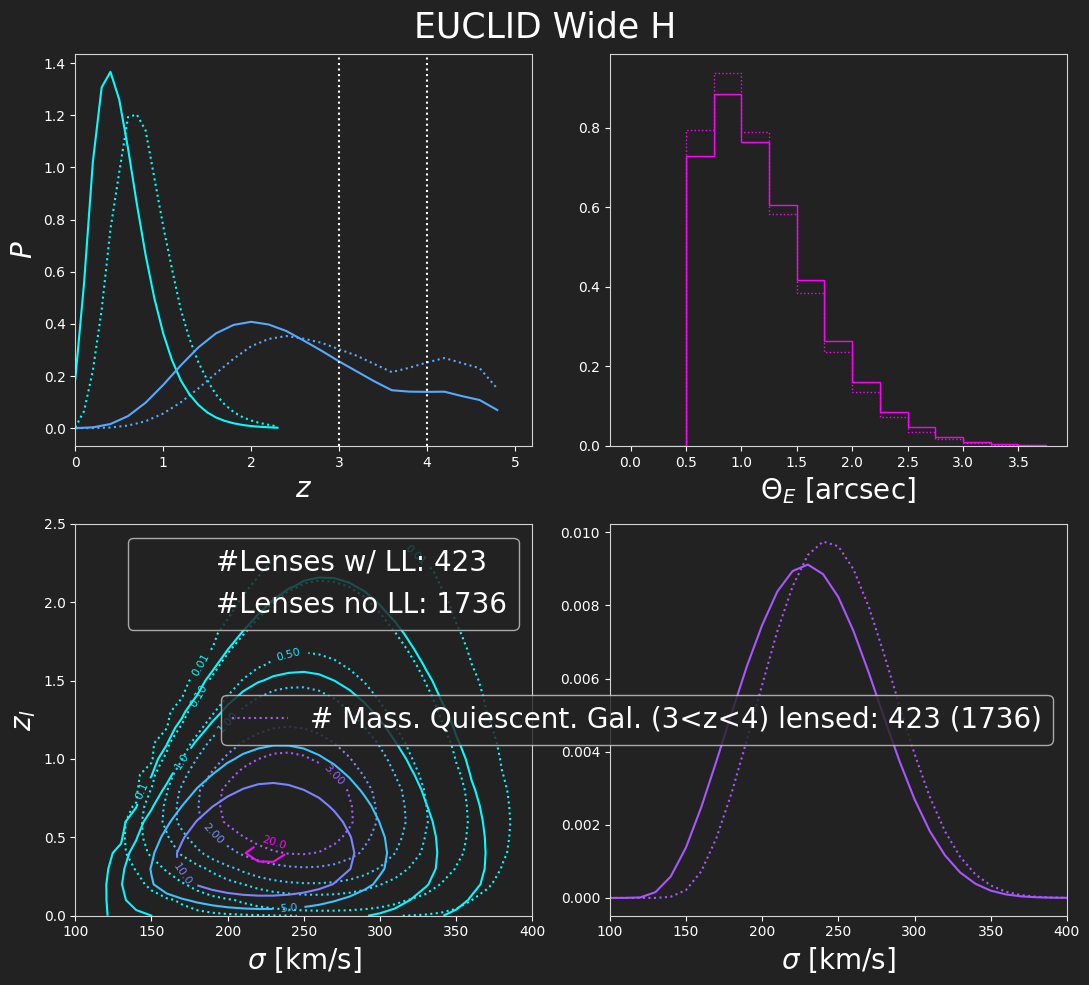

In [42]:
title = 'EUCLID Wide H'
survey_params = utils.read_survey_params(title, VERBOSE = 0)
limit    = survey_params['limit']
cut      = survey_params['cut']
area     = survey_params['area']
seeing   = survey_params['seeing']
exp_time_sec = survey_params['exp_time_sec']
zero_point_m = survey_params['zero_point_m']
sky_bckgnd_m = survey_params['sky_bckgnd_m']
photo_band   = survey_params['photo_band']

def LF_uniform_massive_quiescent(M_int, zs): 
    return 1.5e-6 * np.ones(len(M_int))

LF = LF_uniform_massive_quiescent if 1 else ls.schechter_LF
          
__zs_array__ = np.arange(0.  , 5 , 0.2)
__Mr_array__ = np.linspace(-22.5, -25.5, 50)
matrix_noLL, Theta_E_noLL, prob_noLL = ls.calculate_num_lenses_and_prob(
                                                            sigma_array, zl_array, __zs_array__, __Mr_array__, limit, area, 
                                                            seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m, 
                                                            photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr, 
                                                            LF_func = LF, restframe_band = 'sdss_g0',
                                                            LENS_LIGHT_FLAG = False, SIE_FLAG = True)      
matrix_LL, Theta_E_LL, prob_LL = ls.calculate_num_lenses_and_prob(
                                                            sigma_array, zl_array, __zs_array__, __Mr_array__, limit, area, 
                                                            seeing, min_SNR, exp_time_sec, sky_bckgnd_m, zero_point_m,
                                                            photo_band = photo_band, mag_cut=cut, arc_mu_threshold = arc_mu_thr, 
                                                            LF_func = LF, restframe_band = 'sdss_g0',
                                                            LENS_LIGHT_FLAG = True, SIE_FLAG = True)                                                                                                                                                                                  
utils.print_summary_surveys([title])
print(f'Between 3<z<4 : {np.sum(matrix_noLL[np.logical_and(__zs_array__ > 3, __zs_array__ < 4 )][:][:]):.1f} ({np.sum(matrix_LL[np.logical_and(__zs_array__ > 3, __zs_array__ < 4 )][:][:]):.1f})')
lens_plot.set_plt_param(PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___)
fig, ax = plt.subplots(2, 2, figsize=(11, 10), sharex=False, sharey=False)
plt.subplots_adjust(wspace=.15, hspace=.2)
lens_plot.plot_z_sigma_distributions(fig, ax, title, zl_array,__zs_array__, sigma_array,
                            Theta_E_LL, matrix_LL, Theta_E_noLL, matrix_noLL,
                            PLOT_FOR_KEYNOTE = ___PLOT_FOR_KEYNOTE___, CONTOUR = 0, 
                            LOG = 0, SMOOTH = 1, SAVE = 1, LEGEND = 0)
ax[0,0].axvline(3, c='w', ls=':')
ax[0,0].axvline(4, c='w', ls=':')
ax[0,1].legend([f'# Mass. Quiescent. Gal. (3<z<4) lensed: {np.sum(matrix_LL):.0f} ({np.sum(matrix_noLL):.0f})'], fontsize=12)
plt.show()



In [40]:
print(f'Between 3<z<4 : {np.sum(matrix_noLL[np.logical_and(__zs_array__ > 3, __zs_array__ < 4 )][:][:]):.1f} ({np.sum(matrix_LL[np.logical_and(__zs_array__ > 3, __zs_array__ < 4 )][:][:]):.1f})')


Between 3<z<4 : 226.6 (77.9)
